# Network Analysis with NetworkX / Parte 1

Network Analysis with networkX using the dataset: https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download

### *Steam Video Games*

<blockquote class="epigraph" style=" padding: 10px">

Steam is the world's most popular PC Gaming hub, with over 6,000 games and a community of millions of gamers. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools are a highly valuable asset for Steam.
</blockquote>

## Network Basics

## Install NetworkX

In [ ]:
!pip install networkx

## Import Libraries

In [ ]:
import networkx as nx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Steam Games* Network

The network data that we're going to use in this lesson is taken from Andrew Beveridge and Jie Shan's paper, ["Network of Thrones."](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within 15 words of another character in *A Storm of Swords*, the third book in the series.

| Network Element      | Steam |         
| :-------------: |:-------------:|
| Node    | steamID/Games |
| Edge     | Plays the same game      |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between User1 and User2:

User1 and User2 purcharsed and played Elden Ring

:::{admonition} Pandas Review
:class: pandasreview
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
:::

In [ ]:
steam = pd.read_csv("https://raw.githubusercontent.com/birdenly/network_analysis/main/steam-200k.csv", header = None, names=["Player_ID", "Game_title", "Behavior", "Hours", "Ignore"],nrows=5000)
steam['Behavior'] = steam['Behavior'].map({'purchase': 1, 'play': 0})
steam.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/birdenly/network_analysis/main/steam.graphml'

In [ ]:
steam

,Player_ID,Game_title,Behavior,Hours,Ignore
0,<?xml version='1.0' encoding='utf-8'?>,NaN,NaN,NaN,NaN
1,"<graphml xmlns=""http://graphml.graphdrawing.or...",NaN,NaN,NaN,NaN
2,"<graph edgedefault=""undirected""><node id=""1516...",NaN,NaN,NaN,NaN
3,"<node id=""The Elder Scrolls V Skyrim""/>",NaN,NaN,NaN,NaN
4,"<node id=""Fallout 4""/>",NaN,NaN,NaN,NaN
...,...,...,...,...,...
4995,"<edge source=""FTL Faster Than Light"" target=""6...",NaN,NaN,NaN,NaN
4996,"<data key=""d0"">0</data>",NaN,NaN,NaN,NaN
4997,</edge>,NaN,NaN,NaN,NaN
4998,"<edge source=""FTL Faster Than Light"" target=""5...",NaN,NaN,NaN,NaN


## Create a Network From a Pandas DataFrame

In [ ]:
G = networkx.from_pandas_edgelist(steam, source='Player_ID', target='Game_title', edge_attr='Behavior')

## Output a Network File

In [ ]:
networkx.write_graphml(G, 'steam.graphml')

## Draw a Simple Network

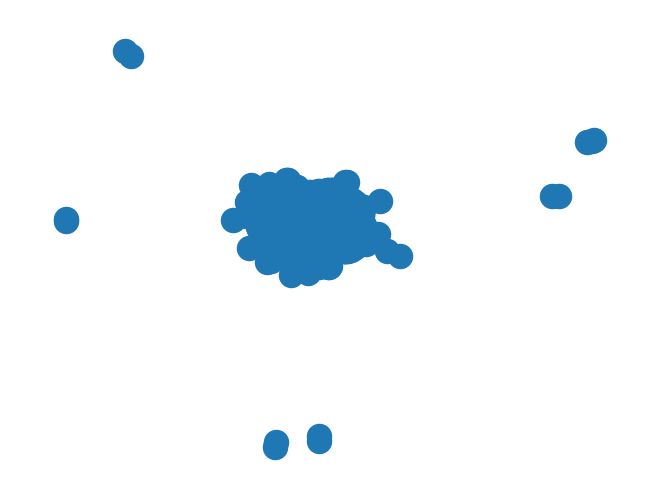

In [ ]:
networkx.draw(G)

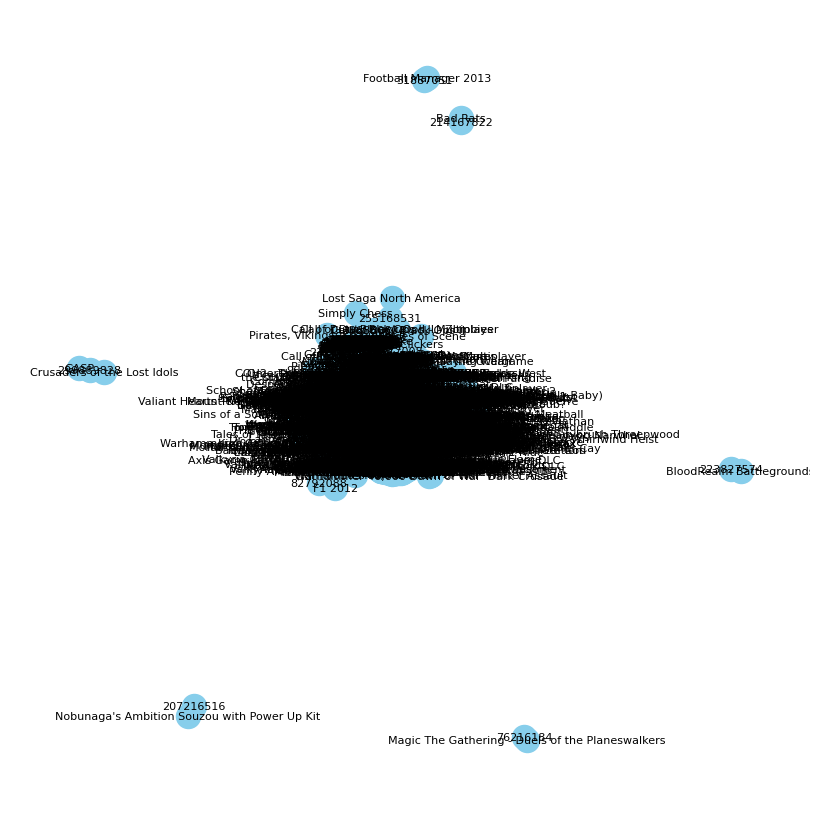

In [ ]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [ ]:
networkx.degree(G)

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 21, 'Fallout 4': 2, 'Spore': 2, 'Fallout New Vegas': 8, 'Left 4 Dead 2': 16, 'HuniePop': 1, 'Path of Exile': 7, 'Poly Bridge': 1, 'Left 4 Dead': 9, 'Team Fortress 2': 45, 'Tomb Raider': 8, 'The Banner Saga': 2, 'Dead Island Epidemic': 8, 'BioShock Infinite': 6, 'Dragon Age Origins - Ultimate Edition': 4, 'Fallout 3 - Game of the Year Edition': 5, 'SEGA Genesis & Mega Drive Classics': 2, 'Grand Theft Auto IV': 5, 'Realm of the Mad God': 5, 'Marvel Heroes 2015': 11, 'Eldevin': 1, 'Dota 2': 113, 'BioShock': 6, 'Robocraft': 15, "Garry's Mod": 21, 'Jazzpunk': 2, 'Alan Wake': 6, 'BioShock 2': 6, 'Fallen Earth': 2, "Fallout New Vegas Courier's Stash": 7, 'Fallout New Vegas Dead Money': 7, 'Fallout New Vegas Honest Hearts': 7, 'Grand Theft Auto Episodes from Liberty City': 4, 'Hitman Absolution': 8, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V S

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [ ]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [ ]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
78,53875128,505
772,11373749,455
1440,9823354,187
1147,56038151,174
680,65117175,127
...,...,...
856,YOU DON'T KNOW JACK Vol. 1 XL,1
857,Port of Call,1
858,LEGO Worlds,1
859,Zeno Clash,1


Plot the nodes with the highest degree values

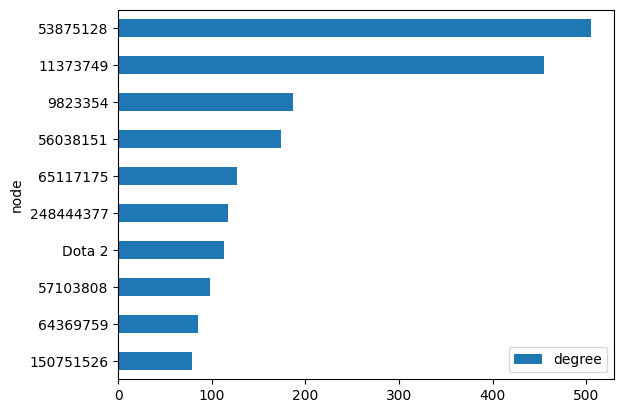

In [ ]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [ ]:
networkx.degree(G, weight='Weight')

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 21, 'Fallout 4': 2, 'Spore': 2, 'Fallout New Vegas': 8, 'Left 4 Dead 2': 16, 'HuniePop': 1, 'Path of Exile': 7, 'Poly Bridge': 1, 'Left 4 Dead': 9, 'Team Fortress 2': 45, 'Tomb Raider': 8, 'The Banner Saga': 2, 'Dead Island Epidemic': 8, 'BioShock Infinite': 6, 'Dragon Age Origins - Ultimate Edition': 4, 'Fallout 3 - Game of the Year Edition': 5, 'SEGA Genesis & Mega Drive Classics': 2, 'Grand Theft Auto IV': 5, 'Realm of the Mad God': 5, 'Marvel Heroes 2015': 11, 'Eldevin': 1, 'Dota 2': 113, 'BioShock': 6, 'Robocraft': 15, "Garry's Mod": 21, 'Jazzpunk': 2, 'Alan Wake': 6, 'BioShock 2': 6, 'Fallen Earth': 2, "Fallout New Vegas Courier's Stash": 7, 'Fallout New Vegas Dead Money': 7, 'Fallout New Vegas Honest Hearts': 7, 'Grand Theft Auto Episodes from Liberty City': 4, 'Hitman Absolution': 8, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V S

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [ ]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [ ]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
78,53875128,505
772,11373749,455
1440,9823354,187
1147,56038151,174
680,65117175,127
...,...,...
856,YOU DON'T KNOW JACK Vol. 1 XL,1
857,Port of Call,1
858,LEGO Worlds,1
859,Zeno Clash,1


Plot the nodes with the highest weighted degree values

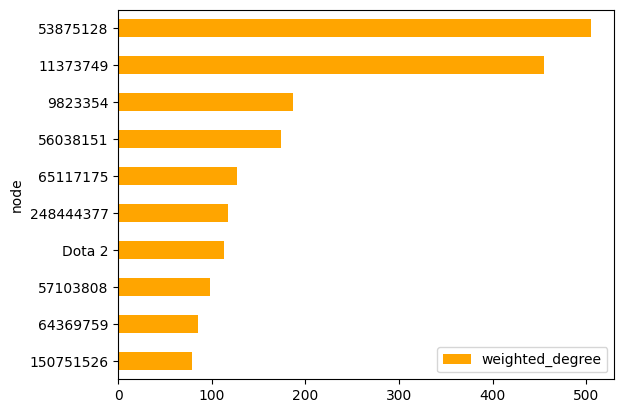

In [ ]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [ ]:
networkx.betweenness_centrality(G)

{151603712: 0.016302077473162813,
 'The Elder Scrolls V Skyrim': 0.017315518665379618,
 'Fallout 4': 0.00016575080288059398,
 'Spore': 0.00017084293614865213,
 'Fallout New Vegas': 0.003022050685864951,
 'Left 4 Dead 2': 0.013115725781384079,
 'HuniePop': 0.0,
 'Path of Exile': 0.0021290863253499606,
 'Poly Bridge': 0.0,
 'Left 4 Dead': 0.0031395788993403718,
 'Team Fortress 2': 0.043985617054736956,
 'Tomb Raider': 0.007455028068229856,
 'The Banner Saga': 0.00017084293614865213,
 'Dead Island Epidemic': 0.0032285024329055806,
 'BioShock Infinite': 0.002294963388245371,
 'Dragon Age Origins - Ultimate Edition': 0.0009352749433197354,
 'Fallout 3 - Game of the Year Edition': 0.0011290324476503698,
 'SEGA Genesis & Mega Drive Classics': 4.772002957622559e-05,
 'Grand Theft Auto IV': 0.002617787561879913,
 'Realm of the Mad God': 0.0008006916631731793,
 'Marvel Heroes 2015': 0.004791768137414035,
 'Eldevin': 0.0,
 'Dota 2': 0.11907756764564761,
 'BioShock': 0.002815092132728351,
 'Robocr

In [ ]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [ ]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [ ]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
78,53875128,0.365048
772,11373749,0.356585
22,Dota 2,0.119078
1440,9823354,0.103853
1329,248444377,0.089039
...,...,...
970,The Dream Machine,0.000000
971,The Dream Machine Chapter 3,0.000000
972,The Dream Machine Chapter 4,0.000000
973,The Dream Machine Chapter 5,0.000000


Plot the nodes with the highest betweenness centrality scores

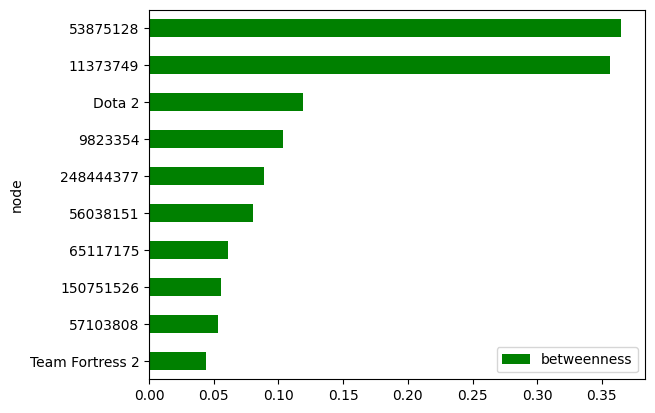

In [ ]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [ ]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [ ]:
# Convert all node identifiers to strings for consistency
G = nx.relabel_nodes(G, {node: str(node) for node in G.nodes()})

# Now try running the community detection again
communities = community.greedy_modularity_communities(G, weight="Behavior")

In [ ]:
communities

[frozenset({'106238372',
            '11373749',
            '213909719',
            '272820556',
            '4 Elements',
            '57103808',
            '7 Grand Steps, Step 1 What Ancients Begat',
            '70165453',
            '9 Clues The Secret of Serpent Creek',
            '92107940',
            'A Game of Thrones - Genesis',
            'Abyss The Wraiths of Eden',
            'Afterfall InSanity Extended Edition',
            'AirBuccaneers',
            'Alchemy Mysteries Prague Legends',
            'Alter Ego',
            'Always Sometimes Monsters',
            'Anodyne',
            'Anomaly Korea',
            'Arma 2 Private Military Company',
            "Assassin's Creed Brotherhood",
            'Aura Fate of the Ages',
            'BEEP',
            'Back to Bed',
            'Battlefield 2',
            'Ben There, Dan That!',
            'Beware Planet Earth',
            'BioShock Infinite',
            'Blackwell Epiphany',
            'Blocks Tha

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [ ]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [ ]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [ ]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [ ]:
communities_df

,node,modularity_class
1601,Nobunaga's Ambition Souzou with Power Up Kit,27
1600,207216516,27
1595,Magic The Gathering - Duels of the Planeswalkers,26
1594,76216184,26
1572,"Pirates, Vikings, & Knights II",25
...,...,...
885,Blackwell Epiphany,0
886,Borderlands 2 Headhunter 1 Bloody Harvest,0
887,Borderlands 2 Headhunter 2 Wattle Gobbler,0
888,Borderlands 2 Headhunter 3 Mercenary Day,0


Inspect each community in the network

In [ ]:
communities_df[communities_df['modularity_class'] == 27]

,node,modularity_class
1601,Nobunaga's Ambition Souzou with Power Up Kit,27
1600,207216516,27


In [ ]:
communities_df[communities_df['modularity_class'] == 10]

,node,modularity_class
1671,246892835,10
1065,124395695,10
599,254906420,10
10,Team Fortress 2,10
1302,164591420,10
1301,145904806,10
1057,119410870,10
1298,84668956,10
1051,295931968,10
1672,Time Clickers,10


In [ ]:
communities_df[communities_df['modularity_class'] == 2]

,node,modularity_class
630,Woodle Tree Adventures,2
1190,Overlord,2
1192,Overlord II,2
1191,Overlord Raising Hell,2
621,Deadbreed Undertaker Beta Pack,2
...,...,...
1413,Lego Star Wars 3 The Clone Wars,2
480,Sonic CD,2
981,Tomb Raider (VI) The Angel of Darkness,2
479,Sonic Adventure 2 Battle Mode DLC,2


In [ ]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
136,Rivals of Aether,1
172,HOARD,1
1667,98152188,1
26,Jazzpunk,1
167,METAL GEAR SOLID V GROUND ZEROES,1
...,...,...
394,Half-Life 2 Update,1
390,Guacamelee! Gold Edition,1
263,Kill The Bad Guy,1
355,Door Kickers,1


In [ ]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
774,Assassin's Creed Brotherhood,0
646,Hotline Miami 2 Wrong Number,0
787,The Book of Unwritten Tales,0
785,Puzzler World 2,0
784,Sherlock Holmes Nemesis,0
...,...,...
885,Blackwell Epiphany,0
886,Borderlands 2 Headhunter 1 Bloody Harvest,0
887,Borderlands 2 Headhunter 2 Wattle Gobbler,0
888,Borderlands 2 Headhunter 3 Mercenary Day,0


Plot a sample of 40 characters with their modularity class indicated by a star

In [ ]:
import seaborn as sns

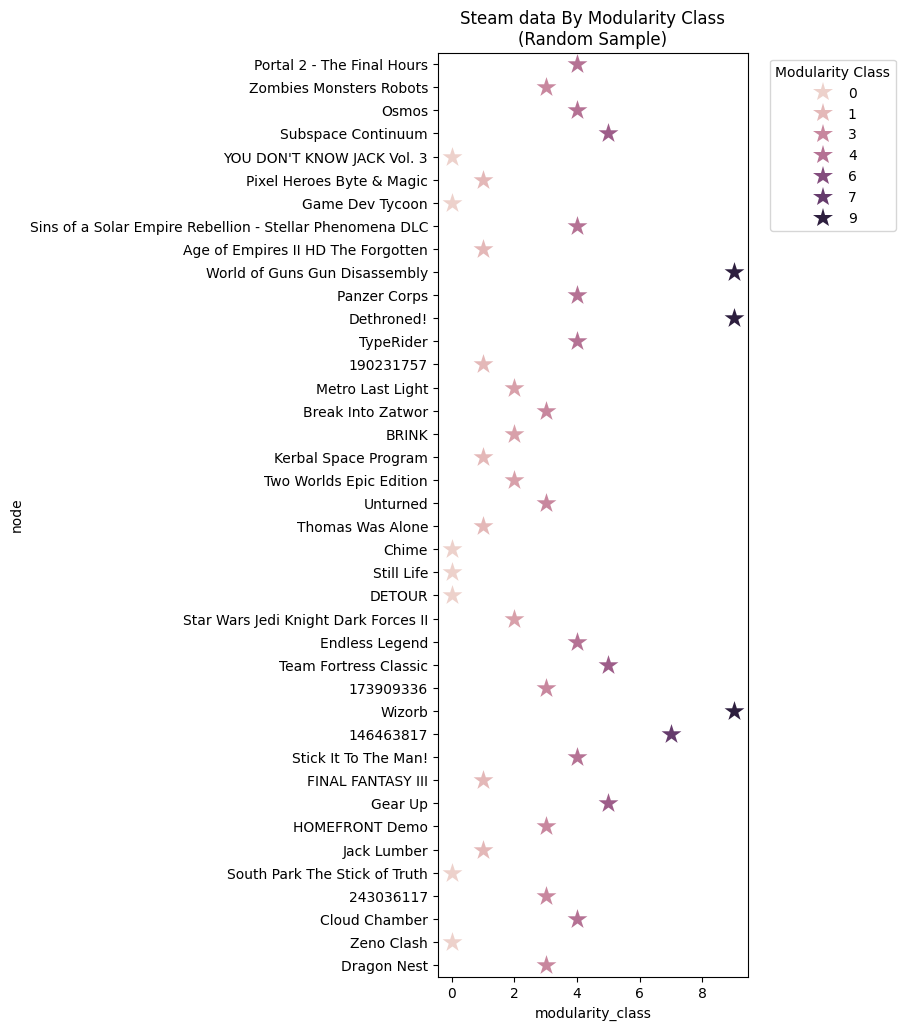

In [ ]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class\n(Random Sample)")
plt.show()

Plot all GOT characters with their modularity class indicated by a star (tak

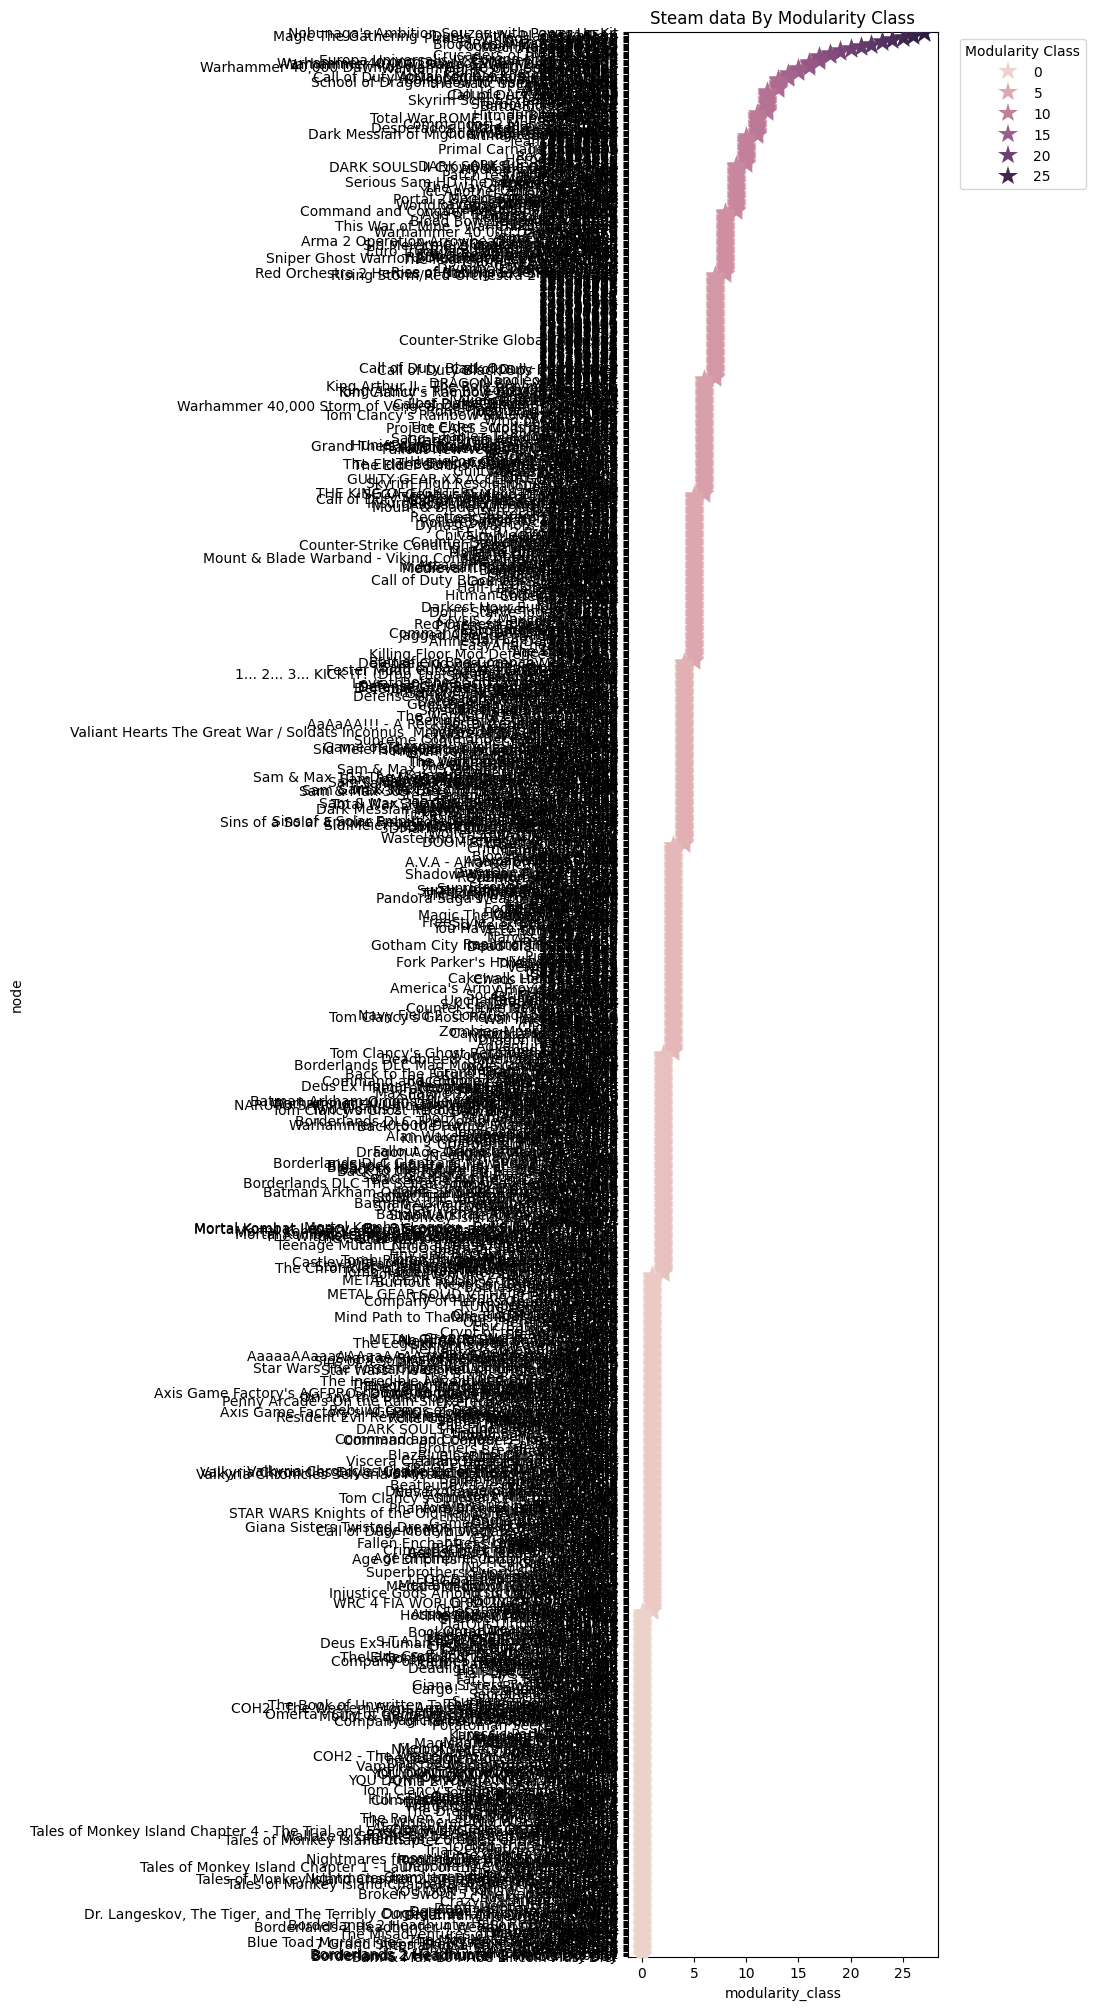

In [ ]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

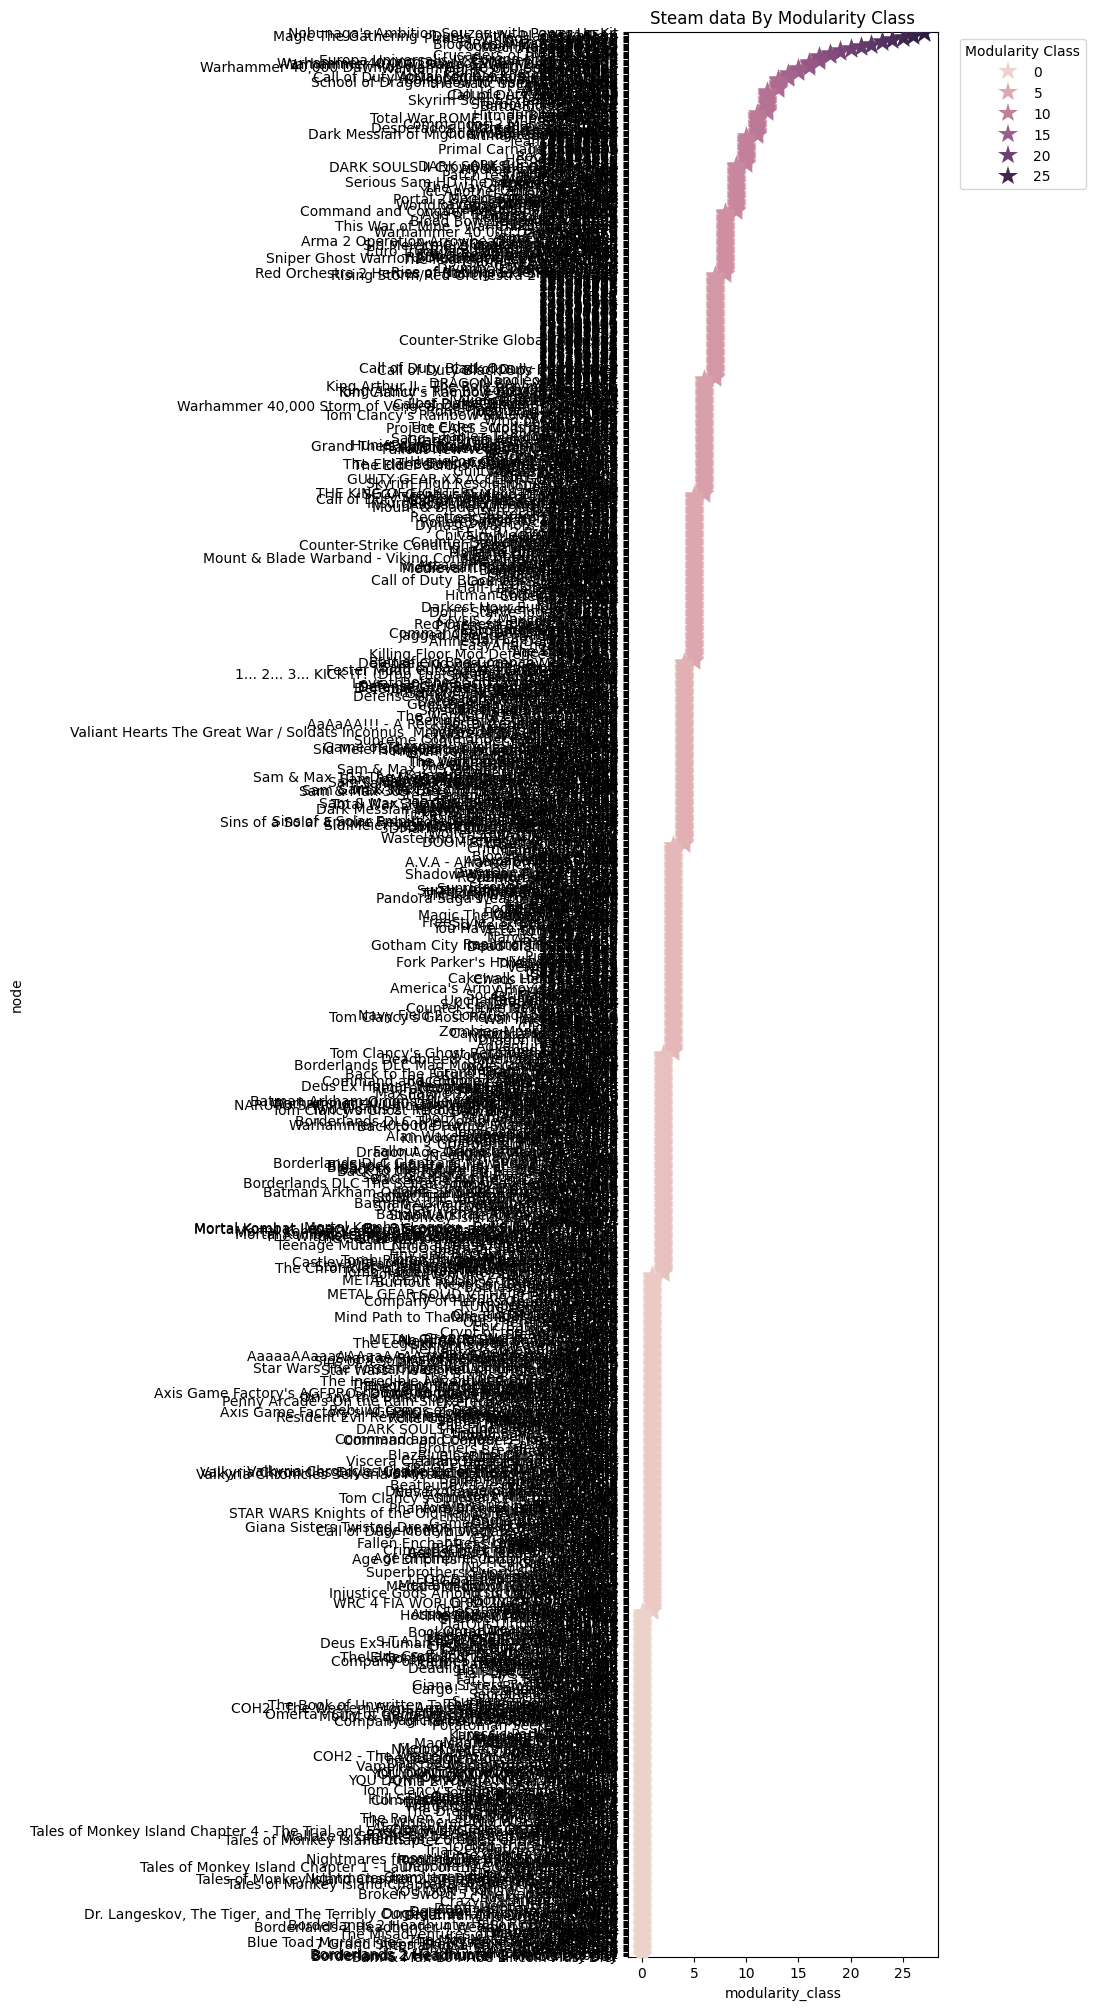

In [ ]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [ ]:
dict(G.nodes(data=True))

{'151603712': {'degree': 40,
  'weighted_degree': 40,
  'betweenness': 0.016302077473162813,
  'modularity_class': 6},
 'The Elder Scrolls V Skyrim': {'degree': 21,
  'weighted_degree': 21,
  'betweenness': 0.017315518665379618,
  'modularity_class': 1},
 'Fallout 4': {'degree': 2,
  'weighted_degree': 2,
  'betweenness': 0.00016575080288059398,
  'modularity_class': 5},
 'Spore': {'degree': 2,
  'weighted_degree': 2,
  'betweenness': 0.00017084293614865213,
  'modularity_class': 6},
 'Fallout New Vegas': {'degree': 8,
  'weighted_degree': 8,
  'betweenness': 0.003022050685864951,
  'modularity_class': 6},
 'Left 4 Dead 2': {'degree': 16,
  'weighted_degree': 16,
  'betweenness': 0.013115725781384079,
  'modularity_class': 6},
 'HuniePop': {'degree': 1,
  'weighted_degree': 1,
  'betweenness': 0.0,
  'modularity_class': 6},
 'Path of Exile': {'degree': 7,
  'weighted_degree': 7,
  'betweenness': 0.0021290863253499606,
  'modularity_class': 6},
 'Poly Bridge': {'degree': 1,
  'weighted_

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [ ]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,weighted_degree,betweenness,modularity_class
151603712,40.0,40.0,0.016302,6.0
The Elder Scrolls V Skyrim,21.0,21.0,0.017316,1.0
Fallout 4,2.0,2.0,0.000166,5.0
Spore,2.0,2.0,0.000171,6.0
Fallout New Vegas,8.0,8.0,0.003022,6.0
...,...,...,...,...
70165453,2.0,2.0,0.001181,0.0
F1 2012,1.0,1.0,0.000000,0.0
143693450,1.0,1.0,0.000000,7.0
139955299,1.0,1.0,0.000000,7.0


In [ ]:
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
53875128,505.0,505.0,0.365048,1.0
11373749,455.0,455.0,0.356585,0.0
Dota 2,113.0,113.0,0.119078,7.0
9823354,187.0,187.0,0.103853,4.0
248444377,117.0,117.0,0.089039,3.0
...,...,...,...,...
The Dream Machine,1.0,1.0,0.000000,0.0
The Dream Machine Chapter 3,1.0,1.0,0.000000,0.0
The Dream Machine Chapter 4,1.0,1.0,0.000000,0.0
The Dream Machine Chapter 5,1.0,1.0,0.000000,0.0


# Pyvis / Parte 2


In [ ]:
!pip install networkx
!pip install pyvis

In [ ]:
from pyvis.network import Network
import networkx as nx
G = nx.read_graphml("/content/steam.graphml")
net = Network(notebook=True) #nenhuma das opçoes de cdn_resources funcionam para mim
net.from_nx(G)
net.show("steam.html")



steam.html
